# 📘 Common Function Library with Auto Parameter Estimation> Pre-built functions that eliminate manual parameter guessing⏱️ **15-20 minutes** | 📊 **Level: ●○○ Beginner** | 🏷️ **Feature Demo**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/05_feature_demos/function_library_demo.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🎯 Learning ObjectivesAfter this tutorial, you'll be able to:1. Use pre-built functions from `nlsq.functions`2. Leverage automatic parameter estimation with `p0='auto'`3. Fit common models without manual parameter guessing4. Apply functions to real-world curve fitting problems---

## 🔬 Feature Overview**What problem does this solve?**- Manual `p0` guessing is tedious and error-prone- Common functions are reimplemented repeatedly- Poor initial guesses lead to convergence failures**Available functions:**- `linear`: y = ax + b- `exponential_decay`: y = a·exp(-bx) + c- `exponential_growth`: y = a·exp(bx) + c- `gaussian`: y = a·exp(-(x-μ)²/(2σ²))- `sigmoid`: y = L/(1 + exp(-k(x-x₀))) + b- `power_law`: y = ax^b- `polynomial(degree)`: Creates polynomial of any degree**All functions include:**- Automatic p0 estimation- Reasonable default bounds- JAX/GPU acceleration- Comprehensive docstrings---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit, functions

## Example 1: Linear FunctionThe simplest case - no guessing needed!

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=50 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=50 | max_nfev=None


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.441672s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=0 | final_cost=20.6285 | elapsed=0.442s | final_gradient_norm=2.9825e-12


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.048503s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.0485 | final_cost=41.2571 | covariance_warning=False


✓ Fitted: slope=2.44, intercept=3.06
  True:   slope=2.50, intercept=3.00


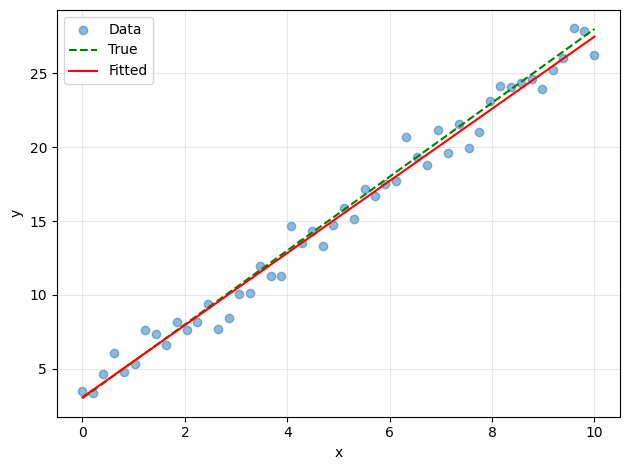

In [5]:
np.random.seed(42)
x = np.linspace(0, 10, 50)
y_true = 2.5 * x + 3.0
y = y_true + np.random.normal(0, 1.0, len(x))

# Fit without specifying p0 - automatic!
popt, pcov = curve_fit(functions.linear, x, y, p0='auto')

print(f'✓ Fitted: slope={popt[0]:.2f}, intercept={popt[1]:.2f}')
print('  True:   slope=2.50, intercept=3.00')

plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, y_true, 'g--', label='True')
plt.plot(x, functions.linear(x, *popt), 'r-', label='Fitted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Example 2: Exponential DecayPerfect for radioactive decay, cooling, discharge, etc.

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=603.2652004194514 | grad_norm=1.0206e+04 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=155.07420340771904 | grad_norm=28.7556 | step=104.09790442628669 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=155.07131014554164 | grad_norm=0.1228 | step=104.09790442628669 | nfev=3


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.236416s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=3 | final_cost=155.0713 | elapsed=1.236s | final_gradient_norm=0.0017


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.780973s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.7810 | final_cost=310.1426 | covariance_warning=False


✓ Fitted: amplitude=101.0, rate=0.519, offset=10.3
  True:   amplitude=100.0, rate=0.500, offset=10.0

  Half-life (fitted): 1.34
  Half-life (true):   1.39


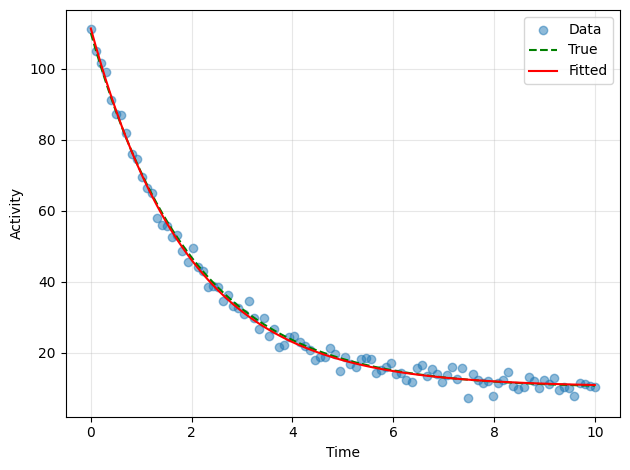

In [6]:
np.random.seed(42)
x = np.linspace(0, 10, 100)
a_true, b_true, c_true = 100.0, 0.5, 10.0
y_true = a_true * np.exp(-b_true * x) + c_true
y = y_true + np.random.normal(0, 2.0, len(x))

# Automatic p0 estimation
popt, pcov = curve_fit(functions.exponential_decay, x, y, p0='auto')

# Calculate half-life
half_life_fitted = np.log(2) / popt[1]
half_life_true = np.log(2) / b_true

print(f'✓ Fitted: amplitude={popt[0]:.1f}, rate={popt[1]:.3f}, offset={popt[2]:.1f}')
print(f'  True:   amplitude={a_true:.1f}, rate={b_true:.3f}, offset={c_true:.1f}')
print(f'\n  Half-life (fitted): {half_life_fitted:.2f}')
print(f'  Half-life (true):   {half_life_true:.2f}')

plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, y_true, 'g--', label='True')
plt.plot(x, functions.exponential_decay(x, *popt), 'r-', label='Fitted')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Example 3: Gaussian PeakCommon in spectroscopy, chromatography, and image analysis.

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=300 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=300 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=1333.9840553322376 | grad_norm=7422.2460 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=145.2522009138421 | grad_norm=259.8419 | step=57.18697278355688 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=144.13703609308806 | grad_norm=2.0267 | step=57.18697278355688 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=144.13694739586646 | grad_norm=0.0120 | step=57.18697278355688 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.891356s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=144.1369 | elapsed=0.891s | final_gradient_norm=8.8611e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.358086s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.3581 | final_cost=288.2739 | covariance_warning=False


✓ Fitted: amplitude=50.1, center=12.00, width=1.50
  True:   amplitude=50.0, center=12.00, width=1.50

  FWHM (fitted): 3.54
  FWHM (true):   3.53


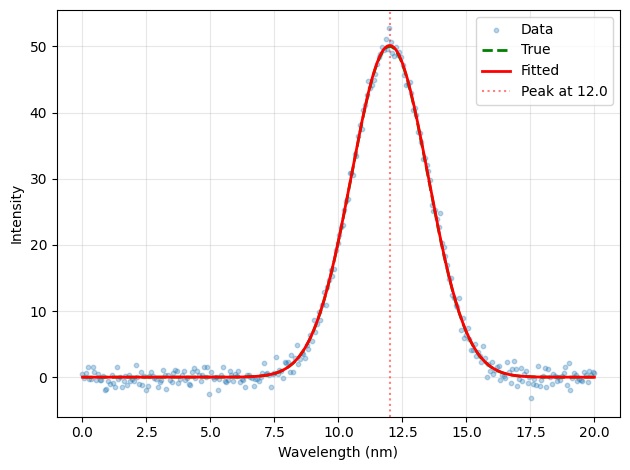

In [7]:
np.random.seed(42)
x = np.linspace(0, 20, 300)
amp_true, mu_true, sigma_true = 50.0, 12.0, 1.5
y_true = amp_true * np.exp(-((x - mu_true)**2) / (2*sigma_true**2))
y = y_true + np.random.normal(0, 1.0, len(x))

# Automatic p0 estimation
popt, pcov = curve_fit(functions.gaussian, x, y, p0='auto')

# Calculate FWHM (Full Width at Half Maximum)
fwhm_fitted = 2.355 * popt[2]
fwhm_true = 2.355 * sigma_true

print(f'✓ Fitted: amplitude={popt[0]:.1f}, center={popt[1]:.2f}, width={popt[2]:.2f}')
print(f'  True:   amplitude={amp_true:.1f}, center={mu_true:.2f}, width={sigma_true:.2f}')
print(f'\n  FWHM (fitted): {fwhm_fitted:.2f}')
print(f'  FWHM (true):   {fwhm_true:.2f}')

plt.scatter(x, y, alpha=0.3, s=10, label='Data')
plt.plot(x, y_true, 'g--', linewidth=2, label='True')
plt.plot(x, functions.gaussian(x, *popt), 'r-', linewidth=2, label='Fitted')
plt.axvline(popt[1], color='r', linestyle=':', alpha=0.5, label=f'Peak at {popt[1]:.1f}')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Example 4: Sigmoid (Dose-Response)Essential for pharmacology, biology, and neural networks.

INFO:nlsq.curve_fit:Starting curve fit n_params=4 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=4 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=4 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=64508.71421625119 | grad_norm=2.5490e+05 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=21792.305690252546 | grad_norm=4.1488e+04 | step=54.636579784289765 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=8967.660763260415 | grad_norm=1.2662e+04 | step=3.4147862365181103 | nfev=6


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=2560.1911256143576 | grad_norm=5589.5968 | step=6.829572473036221 | nfev=7


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=4 | cost=661.9244412383174 | grad_norm=868.1478 | step=13.659144946072441 | nfev=8


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=5 | cost=361.7372739492918 | grad_norm=222.9219 | step=13.659144946072441 | nfev=9


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=6 | cost=357.486847162539 | grad_norm=0.7838 | step=13.659144946072441 | nfev=10


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=7 | cost=357.48593188341886 | grad_norm=0.0186 | step=13.659144946072441 | nfev=11


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.953742s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=8 | final_cost=357.4859 | elapsed=0.954s | final_gradient_norm=3.1858e-04


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.420788s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.4208 | final_cost=714.9719 | covariance_warning=False


✓ Fitted: max=100.0, EC50=5.00, steepness=1.56, baseline=9.7
  True:   max=100.0, EC50=5.00, steepness=1.50, baseline=10.0

  EC50 (half-maximal concentration): 5.00


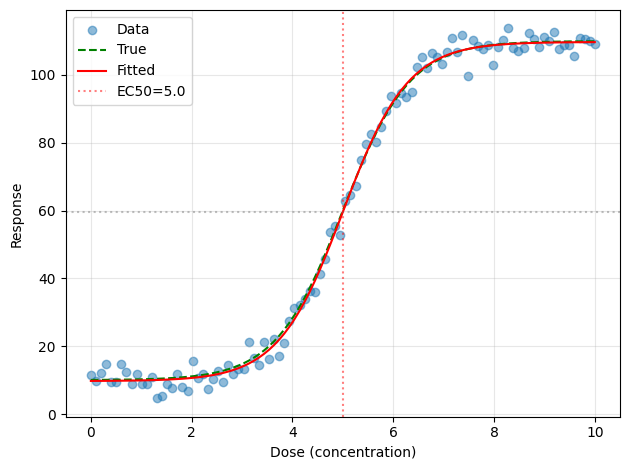

In [8]:
np.random.seed(42)
x = np.linspace(0, 10, 100)
L_true, x0_true, k_true, b_true = 100.0, 5.0, 1.5, 10.0
y_true = L_true / (1 + np.exp(-k_true * (x - x0_true))) + b_true
y = y_true + np.random.normal(0, 3.0, len(x))

# Automatic p0 estimation
popt, pcov = curve_fit(functions.sigmoid, x, y, p0='auto')

print(f'✓ Fitted: max={popt[0]:.1f}, EC50={popt[1]:.2f}, steepness={popt[2]:.2f}, baseline={popt[3]:.1f}')
print(f'  True:   max={L_true:.1f}, EC50={x0_true:.2f}, steepness={k_true:.2f}, baseline={b_true:.1f}')
print(f'\n  EC50 (half-maximal concentration): {popt[1]:.2f}')

plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, y_true, 'g--', label='True')
plt.plot(x, functions.sigmoid(x, *popt), 'r-', label='Fitted')
plt.axhline(popt[0]/2 + popt[3], color='gray', linestyle=':', alpha=0.5)
plt.axvline(popt[1], color='r', linestyle=':', alpha=0.5, label=f'EC50={popt[1]:.1f}')
plt.xlabel('Dose (concentration)')
plt.ylabel('Response')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Example 5: Power LawUsed in allometric scaling, physics, and economics.

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=50 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=50 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=303.5113443995217 | grad_norm=6800.1621 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=289.7195471396068 | grad_norm=4677.3042 | step=3.3581350363658613 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=286.1838178877671 | grad_norm=7.2420 | step=3.3581350363658613 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=286.18380924478674 | grad_norm=9.0096e-04 | step=3.3581350363658613 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.572362s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=286.1838 | elapsed=0.572s | final_gradient_norm=9.2827e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.913361s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.9134 | final_cost=572.3676 | covariance_warning=False


✓ Fitted: prefactor=2.93, exponent=0.751
  True:   prefactor=3.00, exponent=0.750

  Scaling exponent: 0.751 (Kleiber's law predicts 0.75)


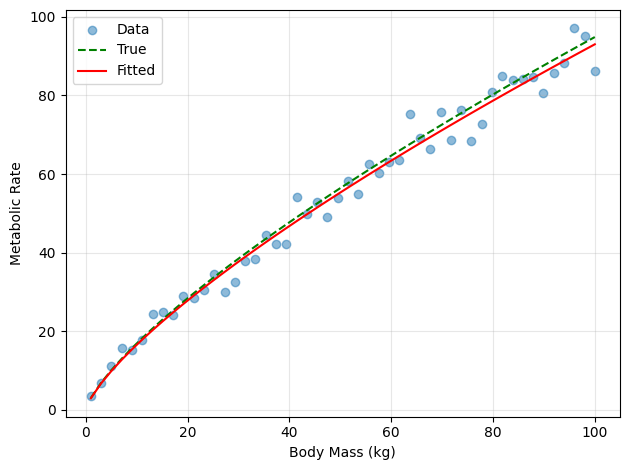

In [9]:
np.random.seed(42)
x = np.linspace(1, 100, 50)
a_true, b_true = 3.0, 0.75
y_true = a_true * x**b_true
y = y_true + np.random.normal(0, 0.5 * np.sqrt(y_true), len(x))

# Automatic p0 estimation
popt, pcov = curve_fit(functions.power_law, x, y, p0='auto')

print(f'✓ Fitted: prefactor={popt[0]:.2f}, exponent={popt[1]:.3f}')
print(f'  True:   prefactor={a_true:.2f}, exponent={b_true:.3f}')
print(f'\n  Scaling exponent: {popt[1]:.3f} (Kleiber\'s law predicts 0.75)')

plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, y_true, 'g--', label='True')
plt.plot(x, functions.power_law(x, *popt), 'r-', label='Fitted')
plt.xlabel('Body Mass (kg)')
plt.ylabel('Metabolic Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Example 6: Polynomial (Quadratic)Create polynomials of any degree.

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=60 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=60 | max_nfev=None


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.087376s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=0 | final_cost=22.0975 | elapsed=0.087s | final_gradient_norm=1.5348e-12


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.500103s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.5001 | final_cost=44.1950 | covariance_warning=False


✓ Fitted: coeffs = [0.54, -2.00, 2.54]
  True:   coeffs = [0.50, -2.00, 3.00]

  Polynomial: y = 0.54x² + -2.00x + 2.54
  Vertex at (1.87, 0.66)


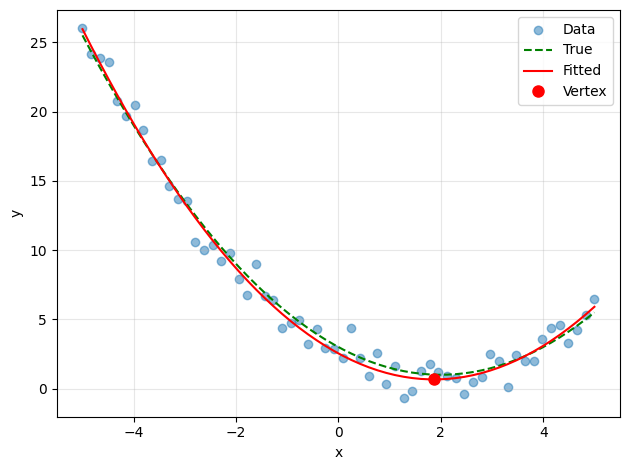

In [10]:
# Create quadratic polynomial function
quadratic = functions.polynomial(2)

np.random.seed(42)
x = np.linspace(-5, 5, 60)
coeffs_true = [0.5, -2, 3]  # y = 0.5x² - 2x + 3
y_true = np.polyval(coeffs_true, x)
y = y_true + np.random.normal(0, 1.0, len(x))

# Automatic p0 estimation
popt, pcov = curve_fit(quadratic, x, y, p0='auto')

print(f'✓ Fitted: coeffs = [{popt[0]:.2f}, {popt[1]:.2f}, {popt[2]:.2f}]')
print('  True:   coeffs = [0.50, -2.00, 3.00]')
print(f'\n  Polynomial: y = {popt[0]:.2f}x² + {popt[1]:.2f}x + {popt[2]:.2f}')

# Find vertex
vertex_x = -popt[1] / (2 * popt[0])
vertex_y = np.polyval(popt, vertex_x)
print(f'  Vertex at ({vertex_x:.2f}, {vertex_y:.2f})')

plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, y_true, 'g--', label='True')
plt.plot(x, quadratic(x, *popt), 'r-', label='Fitted')
plt.plot(vertex_x, vertex_y, 'ro', markersize=8, label='Vertex')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Example 7: Performance ComparisonAuto p0 is just as fast and saves effort!

In [11]:
import time

np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 5 * np.exp(-0.3 * x) + 2 + np.random.normal(0, 0.2, len(x))

# Method 1: Manual p0
start = time.time()
popt_manual, pcov_manual = curve_fit(
    functions.exponential_decay, x, y,
    p0=[5, 0.3, 2]  # User must guess!
)
time_manual = time.time() - start

# Method 2: Auto p0
start = time.time()
popt_auto, pcov_auto = curve_fit(
    functions.exponential_decay, x, y,
    p0='auto'  # Automatic!
)
time_auto = time.time() - start

print(f'Manual p0:   {popt_manual}')
print(f'Auto p0:     {popt_auto}')
print(f'\nDifference:  {np.max(np.abs(popt_manual - popt_auto)):.6f}')
print(f'\nTime (manual): {time_manual*1000:.2f}ms')
print(f'Time (auto):   {time_auto*1000:.2f}ms')
print('\n✓ Auto p0 is just as accurate but saves user effort!')

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=1.654612587737481 | grad_norm=13.6945 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=1.5812261297355485 | grad_norm=2.4840 | step=5.3935146240647205 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=1.5791844194430762 | grad_norm=0.0100 | step=5.3935146240647205 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=1.5791842334317165 | grad_norm=3.1563e-04 | step=5.3935146240647205 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.243989s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=1.5792 | elapsed=0.244s | final_gradient_norm=1.1744e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.462272s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.4623 | final_cost=3.1584 | covariance_warning=False


INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=3.6562959557908012 | grad_norm=72.4618 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=1.5824645121992247 | grad_norm=2.3682 | step=5.496040983727715 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=1.5791845234685045 | grad_norm=0.0051 | step=5.496040983727715 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=1.5791842334886783 | grad_norm=3.3156e-04 | step=5.496040983727715 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.274226s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=1.5792 | elapsed=0.274s | final_gradient_norm=1.2919e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.627094s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.6271 | final_cost=3.1584 | covariance_warning=False


Manual p0:   [4.98965926 0.32414408 2.08304899]
Auto p0:     [4.98965923 0.32414422 2.08304954]

Difference:  0.000001

Time (manual): 554.37ms
Time (auto):   743.27ms

✓ Auto p0 is just as accurate but saves user effort!


## 💡 Key Insights1. **Auto p0** eliminates tedious manual parameter guessing2. **Pre-built functions** cover most common use cases3. **Same accuracy** as manual p0 with less effort4. **Domain-specific features** like half-life, FWHM, EC50 calculations5. **Extensible** - easy to add custom functions---## 📚 Function Summary| Function | Form | Use Cases ||----------|------|-----------|| `linear` | ax + b | Baseline, calibration || `exponential_decay` | a·exp(-bx) + c | Radioactive decay, cooling || `exponential_growth` | a·exp(bx) + c | Population, compound interest || `gaussian` | a·exp(-(x-μ)²/(2σ²)) | Spectroscopy, chromatography || `sigmoid` | L/(1+exp(-k(x-x₀)))+b | Dose-response, growth || `power_law` | ax^b | Allometric scaling, physics || `polynomial(n)` | Σ aᵢx^i | General polynomial fits |---## 🎓 Next Steps- Use pre-built functions for your fitting tasks- Explore `.estimate_p0()` and `.bounds()` methods- Create custom functions following the same pattern- Combine with other NLSQ features (callbacks, error messages)---